In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
import os
from PIL import Image
import imageio

# Import Data

In [2]:


path = kagglehub.dataset_download("luisolazo/tomato-diseases")


print("Path to dataset files:", path)


100%|██████████| 411M/411M [00:07<00:00, 58.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/luisolazo/tomato-diseases/versions/3


In [3]:
dataset_path = path

In [4]:

print(os.listdir(dataset_path))

['test', 'train']


In [5]:
labels=os.listdir(dataset_path+'/train')
print(labels)

['late_blight', 'twospotted_spider_mite', 'bacterial_spot', 'target_spot', 'healthy', 'septoria_leaf_spot', 'yellow_leaf_curl_virus', 'early_blight', 'mosaic_virus', 'leaf_mold']


# Data Preprocessing

In [6]:
test_labels=os.listdir(dataset_path+'/test')

In [7]:
for label in labels:
  print(label,len(os.listdir(dataset_path+'/train/'+label)))

late_blight 2093
twospotted_spider_mite 1232
bacterial_spot 1679
target_spot 1110
healthy 1883
septoria_leaf_spot 1327
yellow_leaf_curl_virus 3595
early_blight 2177
mosaic_virus 1197
leaf_mold 1460


In [8]:
"""
  for label in test_labels:
    bad_images_count = 0
    label_path = os.path.join(dataset_path, 'valid', label)

    for filename in os.listdir(label_path):
        file_path = os.path.join(label_path, filename)

        try:
            # Check if the file is an image
            image = plt.imread(file_path)

            # If image has an alpha channel (transparency)
            if image.shape[-1] == 4:
                bad_images_count += 1
                img = Image.open(file_path).convert("RGB")  # Convert to RGB
                img.save(file_path)  # Overwrite with RGB version

            # Check if the image is NOT PNG
            if not filename.lower().endswith('.png'):
                bad_images_count += 1
                img = Image.open(file_path).convert("RGBA")  # Convert to PNG format
                new_file_path = os.path.splitext(file_path)[0] + ".png"
                img.save(new_file_path, "PNG")

                # Delete the old non-PNG file
                os.remove(file_path)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    print(label, bad_images_count)
"""

'\n  for label in test_labels:\n    bad_images_count = 0\n    label_path = os.path.join(dataset_path, \'valid\', label)\n\n    for filename in os.listdir(label_path):\n        file_path = os.path.join(label_path, filename)\n\n        try:\n            # Check if the file is an image\n            image = plt.imread(file_path)\n\n            # If image has an alpha channel (transparency)\n            if image.shape[-1] == 4:\n                bad_images_count += 1\n                img = Image.open(file_path).convert("RGB")  # Convert to RGB\n                img.save(file_path)  # Overwrite with RGB version\n\n            # Check if the image is NOT PNG\n            if not filename.lower().endswith(\'.png\'):\n                bad_images_count += 1\n                img = Image.open(file_path).convert("RGBA")  # Convert to PNG format\n                new_file_path = os.path.splitext(file_path)[0] + ".png"\n                img.save(new_file_path, "PNG")\n\n                # Delete the old non

In [9]:
"""
# Creates Images In My Dataset
def image_generator(nimages_per_file,labels):

  random_rotation=tf.keras.layers.RandomRotation(factor=0.2)


  for label in labels:
    i=0
    image_number=len(os.listdir(dataset_path+'/train/'+label))

    while image_number<nimages_per_file:
      path_of=os.listdir(dataset_path+'/train/'+label)
      image=plt.imread(dataset_path+'/train/'+label+'/'+path_of[np.random.randint(0,image_number)])
      image_number+=1



      rotated_image=random_rotation(image)

      transformed_image = Image.fromarray(rotated_image)
      new_image_path = os.path.join(dataset_path + '/train/' + label, f"transformed_{image_number}.jpg")

      transformed_image.save(new_image_path)

      print(f"Saved transformed image: {new_image_path}")
"""






'\n# Creates Images In My Dataset\ndef image_generator(nimages_per_file,labels):\n\n  random_rotation=tf.keras.layers.RandomRotation(factor=0.2)\n\n\n  for label in labels:\n    i=0\n    image_number=len(os.listdir(dataset_path+\'/train/\'+label))\n\n    while image_number<nimages_per_file:\n      path_of=os.listdir(dataset_path+\'/train/\'+label)\n      image=plt.imread(dataset_path+\'/train/\'+label+\'/\'+path_of[np.random.randint(0,image_number)])\n      image_number+=1\n\n\n\n      rotated_image=random_rotation(image)\n\n      transformed_image = Image.fromarray(rotated_image)\n      new_image_path = os.path.join(dataset_path + \'/train/\' + label, f"transformed_{image_number}.jpg")\n\n      transformed_image.save(new_image_path)\n\n      print(f"Saved transformed image: {new_image_path}")\n'

In [10]:
#image_examplee=image_generator(nimages_per_file=3595,labels=labels)



In [11]:
for label in labels:
  print(label,len(os.listdir(dataset_path+'/train/'+label)))

late_blight 2093
twospotted_spider_mite 1232
bacterial_spot 1679
target_spot 1110
healthy 1883
septoria_leaf_spot 1327
yellow_leaf_curl_virus 3595
early_blight 2177
mosaic_virus 1197
leaf_mold 1460


In [12]:
path_of=os.listdir(dataset_path+'/train/healthy')
image=plt.imread(dataset_path+'/train/healthy/'+path_of[1])
plt.imshow(image)

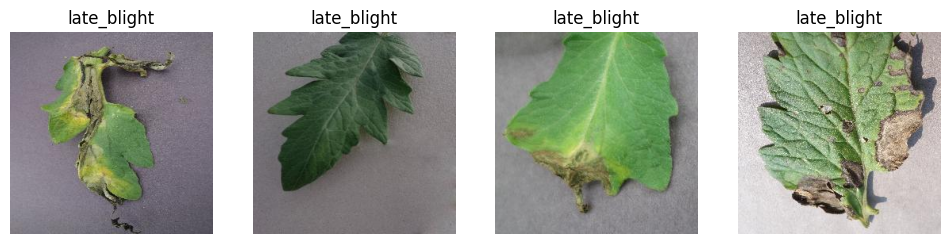

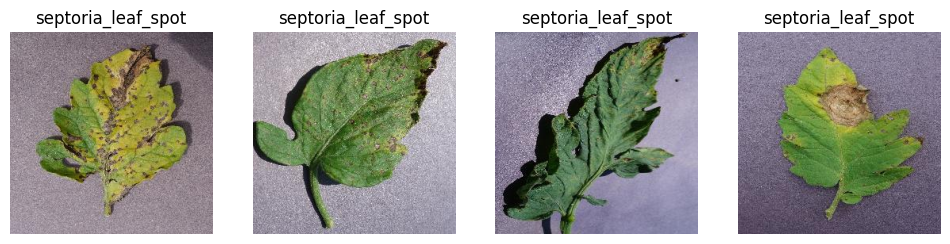

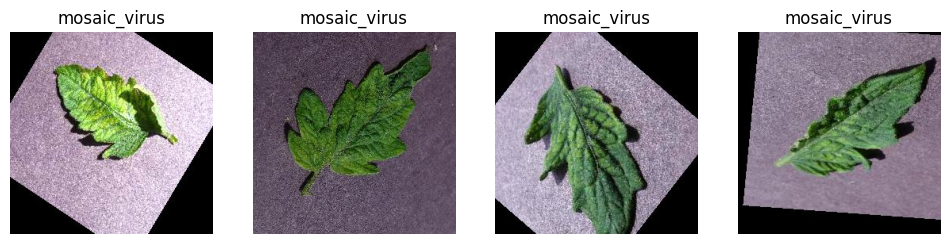

In [13]:
for label in labels:
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Create 1 row, 4 columns of subplots

    path_of_images = os.listdir(os.path.join(dataset_path, 'train', label))[:4]  # Get first 4 images

    for i, image_name in enumerate(path_of_images):
        image_path = os.path.join(dataset_path, 'train', label, image_name)
        image = plt.imread(image_path)

        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(label)  # Set title with label name

    plt.show()  # Show th

In [14]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path+'/train',
                                                               image_size=(255,255),batch_size=32,
                                                               label_mode='int',shuffle=True,)

Found 17753 files belonging to 10 classes.


In [15]:
train_data=train_data.map(lambda x,y:(x/255,y) )

In [16]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path+'/test',
                                                              image_size=(255,255),batch_size=32,
                                                              label_mode='int')

Found 4440 files belonging to 10 classes.


In [17]:
test_data=test_data.map(lambda x,y:(x/255,y))

In [18]:
for image,target in train_data.take(1):
  print(target)

tf.Tensor([0 4 3 4 7 9 8 1 2 1 7 1 5 1 9 7 6 7 4 1 9 3 9 8 3 3 9 3 8 8 6 8], shape=(32,), dtype=int32)


# Train Our Models

Model_1

In [21]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(255,255,3)),

    tf.keras.layers.Conv2D(filters=200,kernel_size=6,strides=1,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=326,kernel_size=4,strides=2,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=646,kernel_size=4,strides=4,padding='valid',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(units=10,activation='softmax')
])
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 255, 255, 200)  │        21,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 326)  │     1,043,526 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 646)    │     3,370,182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 646)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         6,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,441,978 (16.94 MB)

 Trainable params: 4,441,978 (16.94 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return (1e-3)/2
    elif epoch < 20:
        return (1e-4)/2
    else:
        return (1e-5)/2


In [24]:
schedule=tf.keras.callbacks.LearningRateScheduler(lr_schedule)
check_point_1=tf.keras.callbacks.ModelCheckpoint('model_1.h5',monitor='val_accuracy',save_best_only=True)

In [25]:
model_1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(),metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(train_data,epochs=40,validation_data=test_data,callbacks=[check_point_1,schedule])

Epoch 1/40


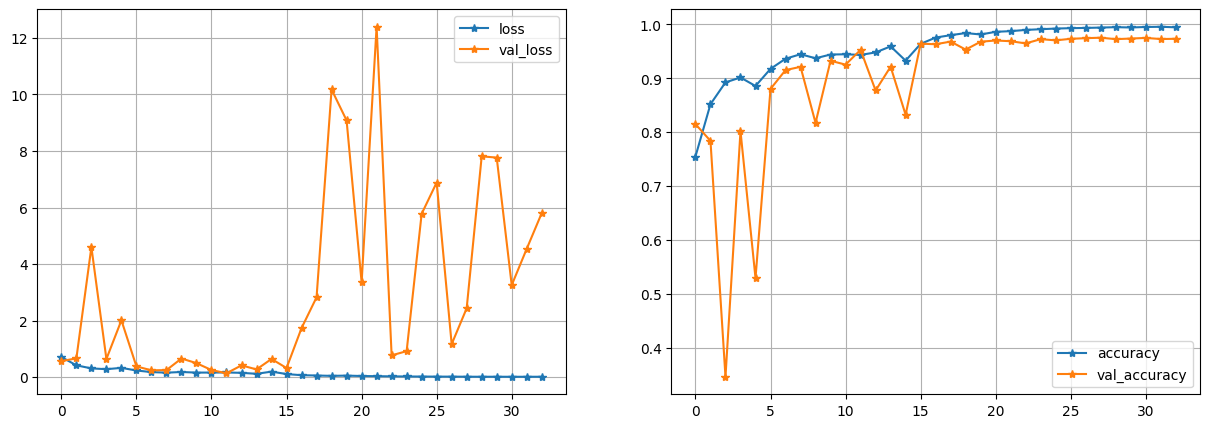

In [ ]:
history=pd.DataFrame(model_1.history.history)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(history[['loss','val_loss']],marker='*')
axes[1].plot(history[['accuracy','val_accuracy']],marker='*')
axes[0].legend(['loss','val_loss'])
axes[1].legend(['accuracy','val_accuracy'])
axes[0].grid()
axes[1].grid()


In [ ]:
model_1.evaluate(test_data)

139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9299 - loss: 0.2074


[0.2122485190629959, 0.9281531572341919]

In [ ]:
from tensorflow import keras

# Load a pretrained ResNet model
model = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(255, 255, 3))

# Add custom layers
x = keras.layers.GlobalAveragePooling2D()(model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(10, activation="softmax")(x)
Res_model = keras.Model(inputs=model.input, outputs=output)


In [ ]:
Res_model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=(1e-2)/2,nesterov=True),metrics=['accuracy'])

In [ ]:
Res_model.fit(train_data,epochs=20,validation_data=test_data)

Epoch 1/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 232s 376ms/step - accuracy: 0.7004 - loss: 0.9382 - val_accuracy: 0.0995 - val_loss: 4.3448
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 185s 332ms/step - accuracy: 0.9604 - loss: 0.1222 - val_accuracy: 0.9124 - val_loss: 0.2721
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 202s 333ms/step - accuracy: 0.9813 - loss: 0.0622 - val_accuracy: 0.9795 - val_loss: 0.0572
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 210s 347ms/step - accuracy: 0.9908 - loss: 0.0356 - val_accuracy: 0.9824 - val_loss: 0.0550
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 195s 334ms/step - accuracy: 0.9951 - loss: 0.0239 - val_accuracy: 0.9849 - val_loss: 0.0429
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 187s 337ms/step - accuracy: 0.9962 - loss: 0.0162 - val_accuracy: 0.9885 - val_loss: 0.0426
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 208s 348ms/step - accuracy: 0.9965 - loss: 0.0155 - val_accuracy: 0.9887 - val_loss: 0.0395
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 194s 334ms/step - accuracy: 0.9985 -

In [ ]:
Res_model.evaluate(test_data)

In [ ]:
Res_history=pd.DataFrame(Res_model.history.history)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(Res_history[['loss','val_loss']],marker='*')
axes[1].plot(Res_history[['accuracy','val_accuracy']],marker='*')
axes[0].legend(['loss','val_loss'])
axes[1].legend(['accuracy','val_accuracy'])
axes[0].grid()
axes[1].grid()

In [ ]:
from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=2,padding='valid',strides=3,activation='relu',kernel_initializer='he_normal' )

In [ ]:
input=tf.keras.layers.Input(shape=(255,255,3))

conv_1=Conv2d(filters=66)(input)
batch_1=tf.keras.layers.BatchNormalization()(conv_1)
max_1=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_1)
conv_1_2=Conv2d(filters=346)(max_1)

conv_2=Conv2d(filters=126)(input)
batch_2=tf.keras.layers.BatchNormalization()(conv_2)
max_2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_2)
conv_2_2=Conv2d(filters=346)(max_2)

conv_3=Conv2d(filters=346)(input)
batch_3=tf.keras.layers.BatchNormalization()(conv_3)
max_3=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_3)
conv_3_2=Conv2d(filters=666)(max_3)

conv_4=Conv2d(filters=666)(input)
batch_4=tf.keras.layers.BatchNormalization()(conv_4)
max_4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_4)
conv_4_2=Conv2d(filters=666)(max_4)

class MY_LAYER(tf.keras.layers.Layer):
  def _init_(self,**kwargs):
    super().__init__(**kwargs)

  def call(self,layer_1,layer_2):
    return tf.subtract(self.layer_1,self.layer_2)

LAYER_1=MY_LAYER()([conv_1_2,conv_2_2])
LAYER_2=MY_LAYER()([conv_3_2,conv_4_2])


concat_layer=tf.keras.layers.Concatenate()([LAYER_1,LAYER_2])
conv_5=Conv2d(filters=1266)(concat_layer)
batch_5=tf.keras.layers.BatchNormalization()(conv_5)
max_5=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_5)
flatten=tf.keras.layers.Flatten()(max_5)
dense_1=tf.keras.layers.Dense(units=100,activation='relu',kernel_initializer='he_normal')(flatten)
drop_1=tf.keras.layers.Dropout(0.3)(dense_1)
dense_2=tf.keras.layers.Dense(units=70,activation='relu',kernel_initializer='he_normal')(drop_1)
drop_2=tf.keras.layers.Dropout(0.2)(dense_2)
dense_3=tf.keras.layers.Dense(units=30,activation='relu',kernel_initializer='he_normal')(dense_2)
output=tf.keras.layers.Dense(units=10,activation='softmax')(dense_3)

model_2=tf.keras.Model(inputs=input,outputs=output)
model_2.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])





TypeError: missing a required argument: 'layer_2'

In [ ]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 255, 255, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 85, 85, 66)     │            858 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 85, 85, 126)    │          1,638 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 85, 85, 346)    │          4,498 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 85, 85, 666)    │          8,658 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 85, 85, 66)     │            264 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 85, 85, 126)    │            504 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 85, 85, 346)    │          1,384 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 85, 85, 666)    │          2,664 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 42, 42, 66)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 42, 42, 126)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 42, 42, 346)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 42, 42, 666)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 42, 42, 1204)   │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ max_pooling2d_1[0][0], │
│                           │                        │                │ max_pooling2d_2[0][0], │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├──────────────────────

 Total params: 12,336,864 (47.06 MB)

 Trainable params: 12,331,924 (47.04 MB)

 Non-trainable params: 4,940 (19.30 KB)

In [ ]:
model_2.fit(train_data,epochs=30,validation_data=test_data,callbacks=[early_stop,schedule])

Epoch 1/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.3814 - loss: 2.3274 - val_accuracy: 0.5829 - val_loss: 1.3022 - learning_rate: 5.0000e-04
Epoch 2/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 121s 218ms/step - accuracy: 0.5641 - loss: 1.2635 - val_accuracy: 0.7016 - val_loss: 0.9117 - learning_rate: 5.0000e-04
Epoch 3/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 117s 211ms/step - accuracy: 0.6571 - loss: 1.0028 - val_accuracy: 0.7932 - val_loss: 0.6744 - learning_rate: 5.0000e-04
Epoch 4/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 121s 217ms/step - accuracy: 0.6927 - loss: 0.8899 - val_accuracy: 0.7779 - val_loss: 0.7166 - learning_rate: 5.0000e-04
Epoch 5/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 117s 211ms/step - accuracy: 0.7206 - loss: 0.8114 - val_accuracy: 0.8622 - val_loss: 0.5030 - learning_rate: 5.0000e-04
Epoch 6/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 146s 217ms/step - accuracy: 0.7558 - loss: 0.7235 - val_accuracy: 0.8617 - val_loss: 0.5037 - learning_rate: 5.0000e-04
Epoch 7/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [ ]:
history=pd.DataFrame(model_2.history.history)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(history[['loss','val_loss']],marker='*')
axes[1].plot(history[['accuracy','val_accuracy']],marker='*')
axes[0].legend(['loss','val_loss'])
axes[1].legend(['accuracy','val_accuracy'])
axes[0].grid()
axes[1].grid()

In [ ]:
input=tf.keras.layers.Input(shape=(255,255,3))

